## 데이터 불러오기

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler

import warnings
warnings.simplefilter(action = 'ignore', category = FutureWarning)

In [5]:
train = pd.read_csv('./train.csv')
train.head()

,id,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,1,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.3100,15
1,2,I,0.430,0.315,0.095,0.3780,0.1750,0.0800,0.1045,8
2,3,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.4100,18
3,4,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.3370,13
4,5,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.0400,6


In [6]:
train.shape

(1253, 10)

## 데이터 결측치 확인

In [7]:
def check_missing_col(dataframe):
    missing_col = []
    counted_missing_col = 0
    for i, col in enumerate(dataframe.columns):
        missing_values = sum(dataframe[col].isna())
        is_missing = True if missing_values >= 1 else False
        if is_missing:
            counted_missing_col += 1
            print(f'결측치가 있는 컬럼은: {col}입니다')
            print(f'해당 컬럼에 총 {missing_values}개의 결측치가 존재합니다')
            missing_col.append([col, dataframe[col].dtype])
    if counted_missing_col == 0:
        print('결측치가 존재하지 않습니다')
    return missing_col

missing_col = check_missing_col(train)

결측치가 존재하지 않습니다


## 데이터의 고유번호 id 값 처리

In [10]:
train = train.drop(columns = ['id'], index = 1)

In [11]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.310,15
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.410,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.337,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.040,6
5,M,0.540,0.415,0.130,0.8245,0.2720,0.2260,0.240,13


## Target(나이) 분포 확인

In [15]:
temp = train['Target'].unique()
np.sort(temp)

array([ 3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19,
       20, 21, 22, 23, 29], dtype=int64)

In [24]:
train.groupby('Target').count().iloc[:,0]

Target
3       5
4      14
5      37
6      88
7     107
8     173
9     200
10    202
11    141
12     79
13     62
14     42
15     26
16     21
17     13
18     12
19      8
20     11
21      5
22      2
23      3
29      1
Name: Gender, dtype: int64

<function matplotlib.pyplot.show(*args, **kw)>

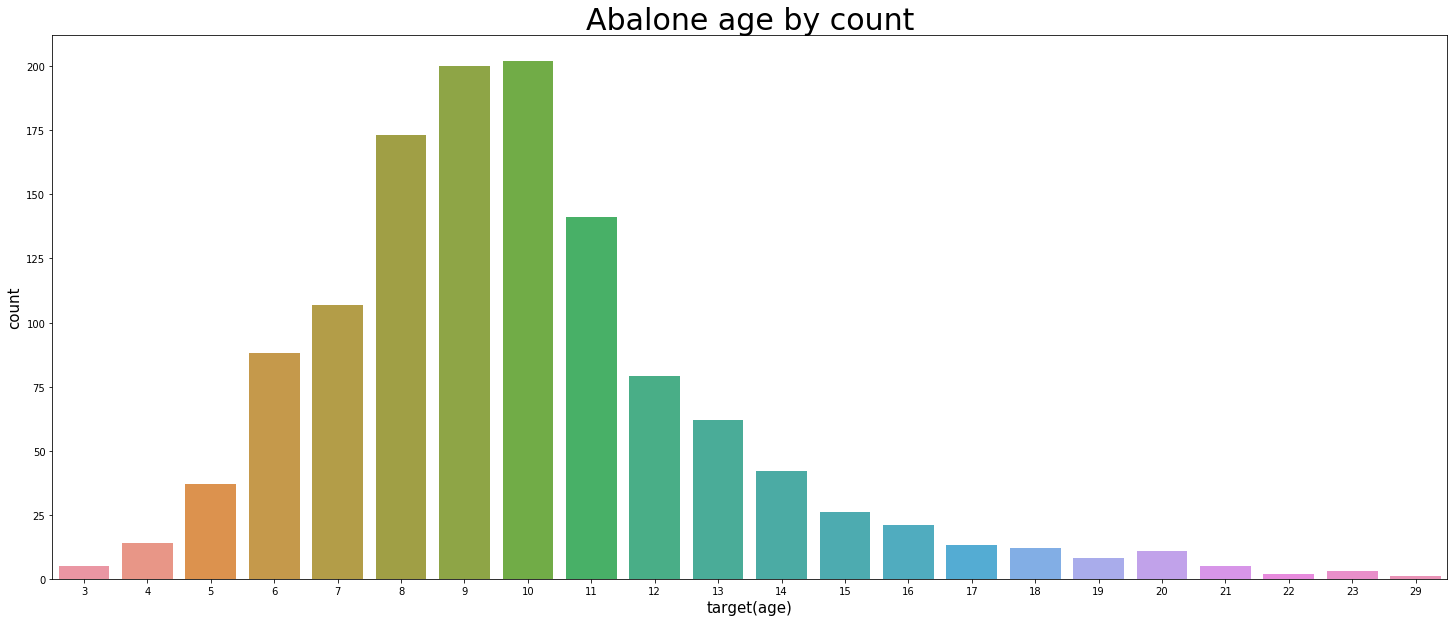

In [25]:
plt.rcParams['figure.figsize'] = [25,10]
sns.countplot('Target', data = train)
plt.title('Abalone age by count', fontsize = 30)
plt.xlabel('target(age)', fontsize = 15)
plt.ylabel('count', fontsize= 15)
plt.show

In [32]:
temp1 = train['Target'] == 23
temp2 = train['Target'] == 29
train[temp1 | temp2]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
553,F,0.45,0.380,0.165,0.8165,0.2500,0.1915,0.265,23
762,F,0.70,0.585,0.185,1.8075,0.7055,0.3215,0.475,29
1131,F,0.55,0.415,0.135,0.7750,0.3020,0.1790,0.260,23
1234,F,0.49,0.385,0.150,0.7865,0.2410,0.1400,0.240,23


In [34]:
train[train['Target'] == 3]

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
20,M,0.155,0.11,0.040,0.0155,0.0065,0.003,0.005,3
210,I,0.195,0.15,0.045,0.0375,0.0180,0.006,0.011,3
285,I,0.130,0.10,0.030,0.0130,0.0045,0.003,0.004,3
463,I,0.110,0.09,0.030,0.0080,0.0025,0.002,0.003,3
1013,I,0.180,0.13,0.045,0.0275,0.0125,0.010,0.009,3


## 데이터 기초 통계 분석
### 카테고리형 데이터 Gender 시각화

In [35]:
print(train['Gender'].unique())

['M' 'I' 'F']


In [40]:
train.groupby('Gender').count().iloc[:,0]

Gender
F    380
I    403
M    469
Name: Lenght, dtype: int64

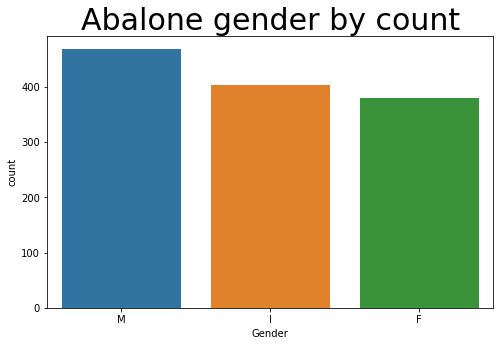

In [59]:
plt.rcParams['figure.figsize'] = [8,5]
sns.countplot('Gender', data = train)
plt.title('Abalone gender by count', fontsize = 30)
plt.show()

### 성별에 따른 나이 분포 그래프

In [50]:
train.head()

,Gender,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
0,M,0.605,0.470,0.115,1.1140,0.3925,0.2910,0.310,15
2,I,0.580,0.490,0.195,1.3165,0.5305,0.2540,0.410,18
3,M,0.535,0.405,0.175,1.2705,0.5480,0.3265,0.337,13
4,I,0.310,0.235,0.090,0.1270,0.0480,0.0310,0.040,6
5,M,0.540,0.415,0.130,0.8245,0.2720,0.2260,0.240,13


plt.rcParams['figure.figsize'] = [25,7]
sns.kdeplot(data = train, x = 'Target', hue = 'Gender')
plt.title('Abalone age by gender', fontsize = 30)
plt.xlabel('target(age)', fontsize = 15)
plt.ylabel('Density', fontsize=15)
plt.show()

## 수치형 데이터 시각화

In [73]:
data_description = train.describe()
data_description

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
count,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000,1252.000000
mean,0.522943,0.407037,0.139581,0.831561,0.358964,0.181087,0.240185,9.913738
std,0.120250,0.099777,0.039028,0.500527,0.224642,0.111944,0.142579,3.215505
min,0.110000,0.090000,0.030000,0.008000,0.002500,0.002000,0.003000,3.000000
25%,0.445000,0.345000,0.115000,0.440875,0.184375,0.092500,0.130000,8.000000
50%,0.537500,0.420000,0.140000,0.777500,0.326000,0.168250,0.230000,10.000000
75%,0.615000,0.480000,0.165000,1.161375,0.505625,0.256500,0.330000,11.000000
max,0.780000,0.630000,0.250000,2.779500,1.488000,0.760000,1.005000,29.000000


In [80]:
print('전복의 평균 나이는', round(data_description['Target']['mean'],1),'입니다')

전복의 평균 나이는 9.9 입니다


## 타겟(나이)와 상관관계 확인하기

모든 feature들의 추세선이 우상향하고 있으므로 양의 상관관계를 가지고 있다

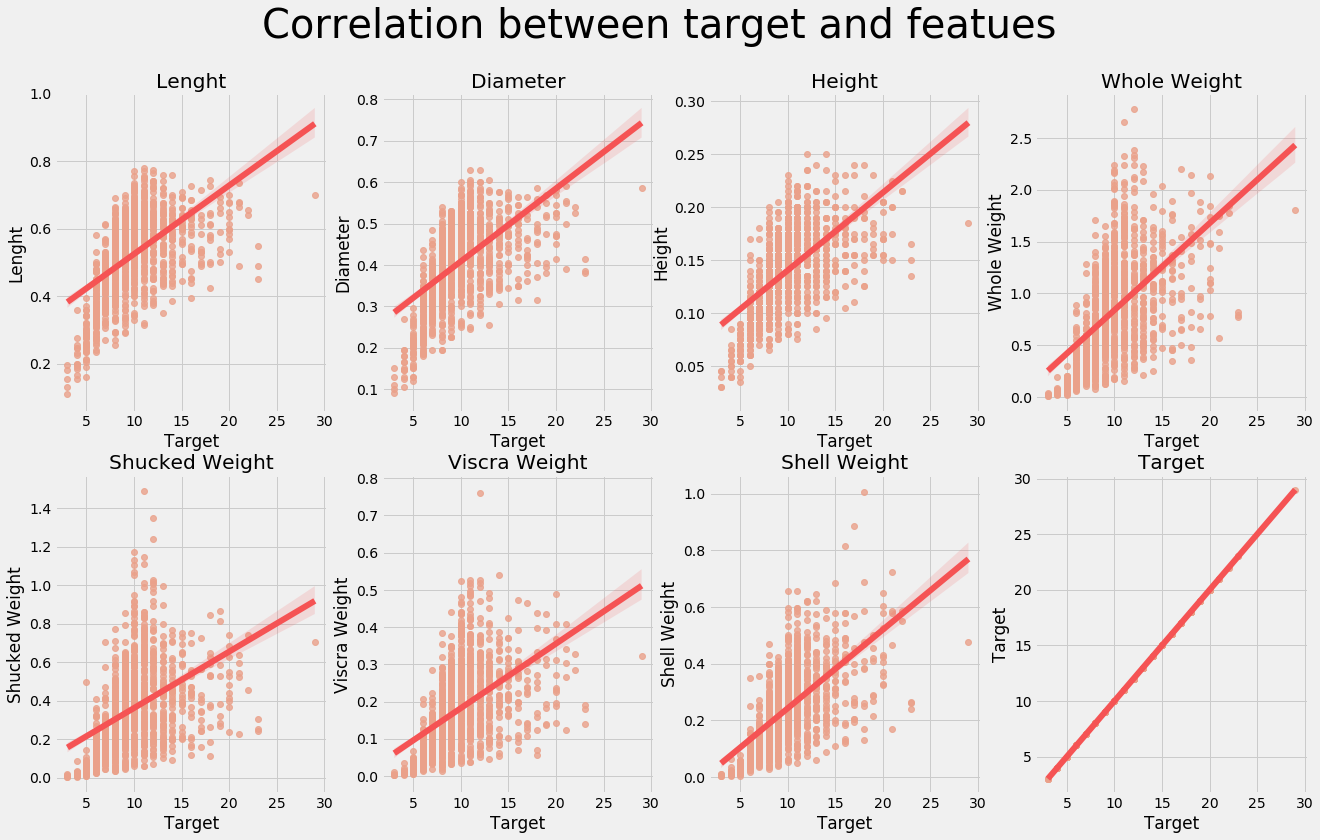

In [90]:
def visualize(axx, yfield):
    # regplot을 이용해 추세선과 산점도 그래프를 그려주자
    sns.regplot(x = 'Target', y=yfield, data= train, color = '#eaa18a', 
                line_kws = {'color':'#f55354'}, ax= axx)
    axx.set_title(yfield)

figure, ((ax1, ax2, ax3, ax4), (ax5, ax6, ax7, ax8)) = plt.subplots(nrows=2, ncols=4)
figure.set_size_inches(20,12)
figure.suptitle('Correlation between target and featues', fontsize=40)
for i in range(len(train.columns[1:,])):
    visualize(eval(f'ax{i+1}'), train.columns[i+1])

### 히트맵 그려보기
- 피어슨 상관관계 분석을 이용해 feature들 간의 상관관계 히트맵을 그려 어떤 컬럼이 높은 상관관계를 갖는지 알아보자

In [122]:
train_corr = train.drop(columns=['Gender'], axis=1)
# feature 값의 범위를 0~1 사이로 변환
scaler = MinMaxScaler()
# train_corr를 dataframe 형식으로 만들기 위해 [train_corr.columns]를 붙임
train_corr[train_corr.columns] = scaler.fit_transform(train_corr[train_corr.columns])
corr28 = train_corr.corr(method='pearson')

Text(0.5, 1, 'Correlation between features')

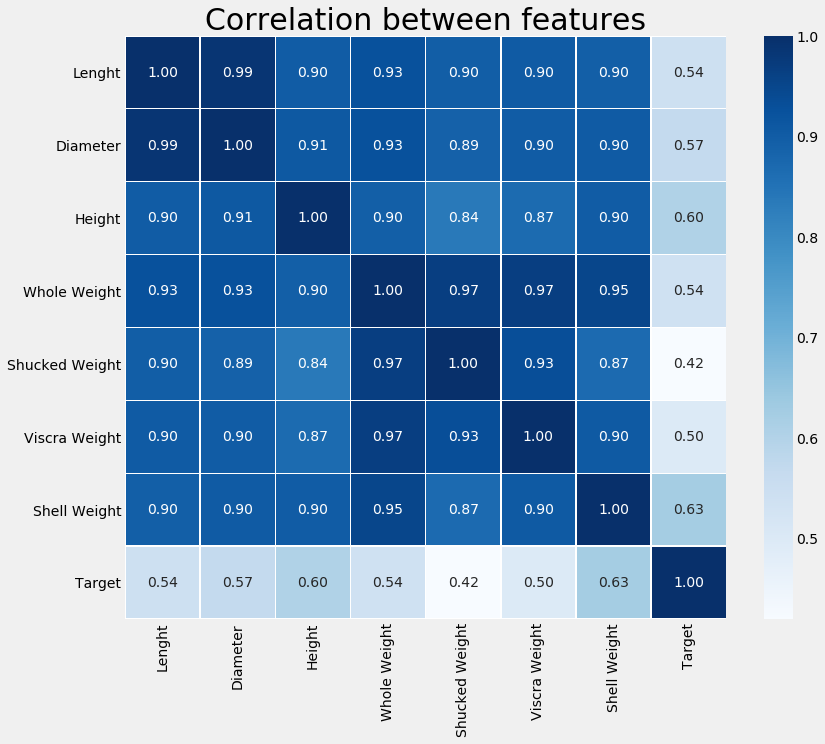

In [130]:
plt.figure(figsize = (12,10))
sns.heatmap(data=corr28, annot=True, fmt = '.2f', linewidths = .5, cmap='Blues')
plt.title('Correlation between features', fontsize=30)

feature가 많아서 헷갈리니 Target과의 관계만을 살펴보자

In [132]:
corr28

,Lenght,Diameter,Height,Whole Weight,Shucked Weight,Viscra Weight,Shell Weight,Target
Lenght,1.000000,0.987295,0.901891,0.926286,0.896285,0.903684,0.895615,0.543628
Diameter,0.987295,1.000000,0.908288,0.927157,0.891121,0.900963,0.904479,0.567768
Height,0.901891,0.908288,1.000000,0.895342,0.837369,0.868103,0.902108,0.604512
Whole Weight,0.926286,0.927157,0.895342,1.000000,0.967991,0.966921,0.951620,0.538226
Shucked Weight,0.896285,0.891121,0.837369,0.967991,1.000000,0.932101,0.870378,0.419908
Viscra Weight,0.903684,0.900963,0.868103,0.966921,0.932101,1.000000,0.904997,0.497086
Shell Weight,0.895615,0.904479,0.902108,0.951620,0.870378,0.904997,1.000000,0.625681
Target,0.543628,0.567768,0.604512,0.538226,0.419908,0.497086,0.625681,1.000000


- 나이가 많을수록 껍질의 무게가 무거워진다
- 상관계수가 0.3 이상이면 유의미한 양의 상관관계를 가진다
- 따라서 나이, 높이, 지름 길이, 무게 모두 나이에 영향을 미친다

In [140]:
s28 = corr28.unstack()
df_temp28 = pd.DataFrame(s28['Target'].sort_values(ascending=False), columns=['Target'])
df_temp28.style.background_gradient(cmap='viridis')

,Target
Target,1.000000
Shell Weight,0.625681
Height,0.604512
Diameter,0.567768
Lenght,0.543628
Whole Weight,0.538226
Viscra Weight,0.497086
Shucked Weight,0.419908
